In [1]:
import os
import datetime
import tqdm
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf
import warnings
warnings.filterwarnings('ignore')

from futures import Futures

In [3]:
data_path = '/home/pagehwang/data/CNFuturesData/'
futures = Futures(data_path)

In [3]:
exchange = 'CZCE'
bid = 'AP'

futures.find_main_contract(bid)

2023-05-04    AP2310
2023-05-05    AP2310
2023-05-08    AP2310
2023-05-09    AP2310
2023-05-10    AP2310
               ...  
2023-12-25    AP2405
2023-12-26    AP2405
2023-12-27    AP2405
2023-12-28    AP2405
2023-12-29    AP2405
Length: 158, dtype: object

In [4]:
ap_concat_df = futures.get_main_contract_concat_data(bid)
ap_minu_bar = futures.resample_last(ap_concat_df,'1min')
ap_minu_bar

,last_price,vol,amount,pb1,vb1,pa1,va1,pb2,vb2,pa2,va2,pb3,vb3,pa3,va3,pb4,vb4,pa4,va4,pb5,vb5,pa5,va5,open,highest,lowest,up_limit,dn_limit,instrumentid,changed_times,adjust_coefficient
resample_note,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-04 08:59:00+08:00,8900.0,2367.0,21066300.0,8900.0,74.0,8903.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8900.0,8900.0,8900.0,9345.0,7801.0,AP2310,1,0.989879
2023-05-04 09:00:00+08:00,8795.0,18964.0,167319000.0,8795.0,15.0,8796.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8900.0,8914.0,8734.0,9345.0,7801.0,AP2310,1,0.989879
2023-05-04 09:01:00+08:00,8785.0,24587.0,216734000.0,8783.0,4.0,8784.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8900.0,8914.0,8734.0,9345.0,7801.0,AP2310,1,0.989879
2023-05-04 09:02:00+08:00,8799.0,29025.0,255768000.0,8798.0,4.0,8801.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8900.0,8914.0,8734.0,9345.0,7801.0,AP2310,1,0.989879
2023-05-04 09:03:00+08:00,8785.0,31578.0,278234000.0,8784.0,19.0,8785.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8900.0,8914.0,8734.0,9345.0,7801.0,AP2310,1,0.989879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 14:55:00+08:00,8165.0,115279.0,947248000.0,8165.0,1.0,8166.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8240.0,8305.0,8146.0,9047.0,7401.0,AP2405,2,0.937306
2023-12-29 14:56:00+08:00,8160.0,115799.0,951520000.0,8160.0,155.0,8161.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8240.0,8305.0,8146.0,9047.0,7401.0,AP2405,2,0.937306
2023-12-29 14:57:00+08:00,8166.0,116340.0,955966000.0,8166.0,13.0,8167.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8240.0,8305.0,8146.0,9047.0,7401.0,AP2405,2,0.937306


In [4]:
minu_price = futures.all_bids_minute_bar(multi_processor=50)
minu_price.columns = [i[:-11] for i in minu_price.columns]
minu_price

100%|██████████| 62/62 [00:00<00:00, 112.32it/s]


RS2311 was replaced at 2023-05-23, but was called back on 2023-05-26
RS2311 was replaced at 2023-05-23, but was called back on 2023-05-31
RS2309 was replaced at 2023-05-09, but was called back on 2023-06-01
RS2309 was replaced at 2023-05-09, but was called back on 2023-06-02
RS2309 was replaced at 2023-05-09, but was called back on 2023-06-05
RS2309 was replaced at 2023-05-09, but was called back on 2023-06-06
RS2309 was replaced at 2023-05-09, but was called back on 2023-06-07
RS2309 was replaced at 2023-05-09, but was called back on 2023-06-08
RS2309 was replaced at 2023-05-09, but was called back on 2023-06-09
RS2309 was replaced at 2023-05-09, but was called back on 2023-06-13
RS2309 was replaced at 2023-05-09, but was called back on 2023-06-14
RS2311 was replaced at 2023-05-23, but was called back on 2023-06-15
RS2309 was replaced at 2023-05-09, but was called back on 2023-06-16
RS2309 was replaced at 2023-05-09, but was called back on 2023-06-19
RS2309 was replaced at 2023-05-09,

,BU,SP,SN,RB,NI,ZN,SS,AG,BR,CU,HC,RU,WR,AO,AU,PB,FU,AL,I,P,CS,Y,V,JM,RR,L,EG,B,J,A,C,FB,PG,M,JD,EB,LH,PP,SC,NR,BC,LU,EC,SF,RS,CJ,CF,MA,SH,OI,SM,PF,AP,RM,CY,SA,FG,TA,PX,SR,PK,UR
resample_note,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-03 08:59:00+08:00,3538.289633,5350.910454,199007.186356,3918.000000,105931.063851,18499.048273,16850.000000,5784.339665,NaN,69406.270378,3952.629052,12307.001934,4810.000000,NaN,466.347382,16503.264535,3615.875119,18660.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498.500000,10299.346107,61650.000000,4505.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 09:00:00+08:00,3538.289633,5328.568448,197737.330976,3888.376098,105009.122478,18405.775761,16835.000000,5785.416422,NaN,69437.742387,3934.392055,12345.764145,4810.000000,NaN,466.188914,16492.982127,3623.724341,18535.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,497.710401,10315.289367,61483.518987,4448.849473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 09:01:00+08:00,3539.200859,5322.185018,198817.655702,3875.953171,105064.438960,18382.457633,16815.000000,5795.107237,NaN,69406.270378,3918.074742,12355.454698,4810.000000,NaN,466.143638,16467.276108,3638.114582,18540.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.114132,10325.918208,61441.898734,4449.929291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 09:02:00+08:00,3535.555956,5311.014015,198656.554647,3872.130732,104939.976875,18432.980244,16815.000000,5801.567780,NaN,69437.742387,3914.235375,12336.073592,4810.000000,NaN,466.279467,16487.840923,3647.272008,18585.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.430130,10304.660527,61473.113924,4463.966922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 09:03:00+08:00,3526.443698,5303.034727,198381.735199,3857.796585,104783.246841,18417.434825,16780.000000,5796.183994,NaN,69395.779709,3907.516481,12311.847211,4810.000000,NaN,466.573764,16472.417311,3651.196620,18560.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.956529,10294.031687,61441.898734,4475.844919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 14:56:00+08:00,3524.926507,5349.012968,234042.050064,3858.910464,134416.785341,20169.831416,17776.913518,5479.015042,12614.767814,71555.475992,3952.629052,12163.414763,4622.865220,3671.131985,465.979493,16104.073173,3671.356464,18162.801045,977.0,7119.941491,3028.043183,7524.0,5846.361927,1947.841921,3411.107999,8288.218362,4295.828037,3925.137811,2487.5,4988.0,2415.0,1035.324324,4790.0,4332.951120,4337.823834,8481.0,16056.885417,7648.089199,522.283222,9568.198814,66823.766009,4767.239199,1634.9,6900.052585,NaN,14573.147793,17599.212870,2432.0,2829.0,9295.705412,6560.172414,8102.700535,8705.802617,2875.0,20360.462876,2042.0,1914.0,6334.871164,8592.0,6924.995797,9489.522238,2092.168599
2023-12-29 14:57:00+08:00,3523.962886,5347.115482,233986.869688,3857.946941,134213.900139,20169.831416,17789.913089,5477.182595,12579.823859,71565.861402,3950.707501,12150.543425,4622.865220,3673.325014,466.037581,16099.007406,3672.609915,18144.215421,977.0,7115.926864,3030.165148,7524.0,5843.383142,1947.325663,3411.107999,8287.217370,4294.857009,3925.137811,2485.5,4989.0,2415.0,1031.833977,4791.0,4330.340122,4341.398964,8479.0,16045.173611,7648.089199,522.283222,9559.644323,66834.626364,4770.747101,1630.1,6895.915863,NaN,14563.538068,17599.212870,2431.0,2826.0,92

RS(菜籽): CZCE


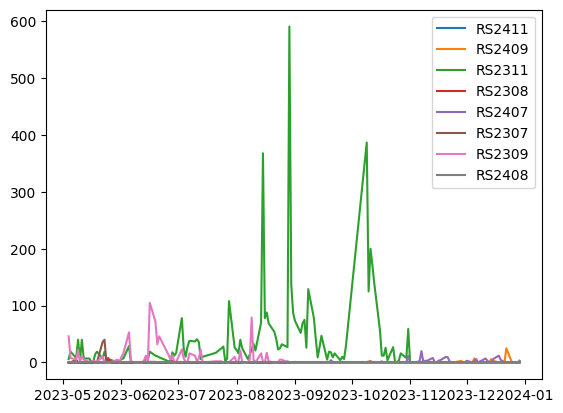

In [52]:
bid = "RS"
daily_vol = futures.get_daily_vol(bid).fillna(0)
print(f"{bid}({futures.info.loc[bid,'cn_name']}): {futures.info.loc[bid,'exchange']}")
daily_vol.plot()
plt.show()

BC(国际铜): INE


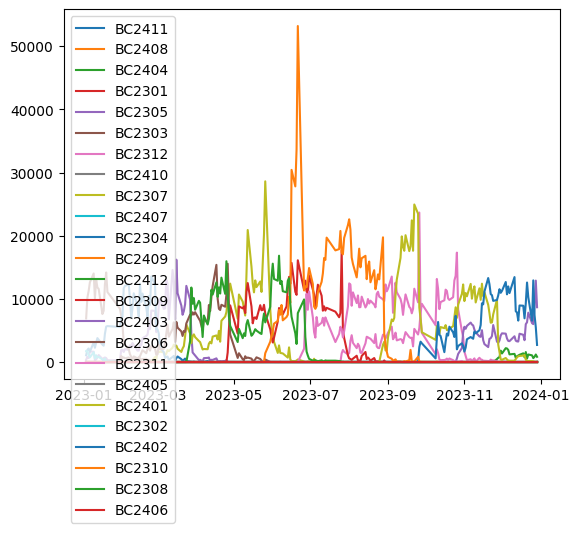

In [53]:
bid = "BC"
daily_vol = futures.get_daily_vol(bid).fillna(0)
print(f"{bid}({futures.info.loc[bid,'cn_name']}): {futures.info.loc[bid,'exchange']}")
daily_vol.plot()
plt.show()

In [73]:
bid = "SA"
ser = minu_price.drop(bid,axis=1).corrwith(minu_price[bid])
ser.name = f'corr_{bid}'
corr_df = pd.merge(ser,futures.info,how='left',left_index=True,right_index=True)
corr_df = corr_df.sort_values(f'corr_{bid}',ascending=False)
corr_df.T

,UR,ZN,RB,M,I,SM,MA,AP,PF,PP,HC,SR,WR,SP,RU,V,SF,PB,CU,CS,OI,C,SN,TA,FU,FG,RS,P,BR,NI,RR,AL,CY,JM,Y,CJ,LU,JD,SC,AO,B,CF,BU,L,J,EB,AG,PX,LH,SH,BC,RM,NR,PG,PK,AU,A,EG,EC,SS,FB
corr_SA,0.826381,0.75437,0.74624,0.738637,0.726554,0.678026,0.668666,0.660787,0.629587,0.626073,0.588421,0.560451,0.553994,0.53186,0.494051,0.490078,0.407155,0.392629,0.367879,0.342541,0.32959,0.267649,0.248694,0.19921,0.196716,0.19406,0.187074,0.177866,0.15847,0.155093,0.146372,0.144199,0.142058,0.130212,0.123344,0.102769,0.079005,0.069985,0.052725,0.021792,-0.022555,-0.048548,-0.070232,-0.077356,-0.078741,-0.089344,-0.099347,-0.110476,-0.115734,-0.122785,-0.161332,-0.178287,-0.184567,-0.185422,-0.246381,-0.248534,-0.274827,-0.290238,-0.308446,-0.340738,-0.614109
exchange,CZCE,SHFE,SHFE,DCE,DCE,CZCE,CZCE,CZCE,CZCE,DCE,SHFE,CZCE,SHFE,SHFE,SHFE,DCE,CZCE,SHFE,SHFE,DCE,CZCE,DCE,SHFE,CZCE,SHFE,CZCE,CZCE,DCE,SHFE,SHFE,DCE,SHFE,CZCE,DCE,DCE,CZCE,INE,DCE,INE,SHFE,DCE,CZCE,SHFE,DCE,DCE,DCE,SHFE,CZCE,DCE,CZCE,INE,CZCE,INE,DCE,CZCE,SHFE,DCE,DCE,INE,SHFE,DCE
cn_name,尿素,沪锌,螺纹钢,豆粕,铁矿石,锰硅,甲醇,苹果,短纤,聚丙烯,热轧卷板,白糖,线材,纸浆,橡胶,PVC,硅铁,沪铅,沪铜,玉米淀粉,菜油,玉米,沪锡,PTA,燃油,玻璃,菜籽,棕榈油,丁二烯橡胶,沪镍,粳米,沪铝,棉纱,焦煤,豆油,红枣,低硫燃料油,鸡蛋,原油,氧化铝,豆二,郑棉,沥青,塑料,焦炭,苯乙烯,沪银,对二甲苯,生猪,烧碱,国际铜,菜粕,20号胶,LPG,花生,沪金,豆一,乙二醇,集运指数(欧线),不锈钢,纤维板


In [46]:
column_thresh = len(minu_price) * 0.2
row_thresh = minu_price.shape[1] * 0.1

df = minu_price.dropna(axis=1, thresh=column_thresh)
df = df[df.index>'2023-5-01']

df.dropna(axis=1, thresh=column_thresh/10, inplace=True)

df.dropna(axis=0, thresh=row_thresh, inplace=True)

df.ffill(inplace=True)

df.dropna(axis=1, inplace=True)

bids = df.columns
len(bids)

54

In [47]:
df

,BU,SP,SN,RB,NI,ZN,SS,AG,CU,HC,RU,AU,PB,FU,AL,I,P,CS,Y,V,JM,L,EG,B,J,A,C,FB,PG,M,JD,EB,LH,PP,SC,NR,BC,LU,SF,CJ,CF,MA,OI,SM,PF,AP,RM,CY,SA,FG,TA,SR,PK,UR
resample_note,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-04 08:59:00+08:00,3391.659271,5004.000000,206183.508897,3554.159751,118104.935121,19361.180208,17829.936295,5760.000000,71003.345126,3685.421836,11660.000000,470.606439,15931.085669,2850.340229,17506.908583,979.000000,7111.912236,2984.000000,7638.971156,5911.000000,1947.325663,8287.217370,4299.712150,3921.167628,3122.568763,4932.190593,2318.499021,1265.000000,5122.274234,3503.000000,4339.015544,8469.550146,13055.208177,7448.000000,469.070127,11425.680734,65577.861818,4780.268496,7034.181513,14553.928343,15265.000000,2394.539927,8034.000000,6313.273062,8124.980240,8991.000000,2554.556962,20408.641917,2044.000000,2333.466581,5660.000000,6900.000000,10306.000000,1970.000000
2023-05-04 09:00:00+08:00,3384.033281,5028.000000,204510.778199,3544.422327,118615.603957,19315.506275,17876.459286,5759.000000,71173.285817,3684.423077,11700.000000,470.709133,16056.280842,2840.160442,17521.168894,979.694326,7124.385628,2990.000000,7673.740235,5898.106879,1904.992496,8286.174952,4315.488980,3922.147920,3121.832656,4922.971545,2322.888455,1271.000000,5204.307829,3477.000000,4350.434006,8457.976848,12879.809960,7477.587945,473.491689,11473.788864,65644.325867,4794.874872,7003.176856,14492.230107,15349.474284,2417.574417,8045.000000,6332.890577,8172.667380,8884.926404,2539.949674,20545.185017,2065.850340,2342.679365,5657.909897,6921.000000,10326.000000,1983.000000
2023-05-04 09:01:00+08:00,3363.061807,5034.000000,201106.965732,3538.579873,117964.501191,19237.860589,17864.828538,5755.000000,71013.966419,3674.435484,11720.000000,470.442128,16019.765583,2806.567146,17478.387960,972.751064,7126.464527,2993.000000,7665.559275,5880.254866,1883.825913,8276.793197,4315.488980,3915.285877,3107.110502,4932.190593,2324.644228,1269.000000,5199.482324,3475.000000,4347.319880,8439.038724,12887.782606,7468.405479,470.800304,11479.802380,65500.320428,4759.022859,6993.487901,14567.639062,15319.659831,2421.762506,7997.000000,6307.922830,8120.438608,8874.824157,2536.512665,20531.530707,2052.938776,2347.943813,5624.468242,6902.000000,10308.000000,1983.000000
2023-05-04 09:02:00+08:00,3364.968304,5024.000000,201719.651976,3543.448585,117868.750784,19146.512723,17911.351529,5768.000000,70939.617367,3685.421836,11715.000000,470.893983,16030.198514,2821.836826,17459.374212,976.917021,7116.070034,2984.000000,7649.197356,5861.411074,1886.648124,8261.156938,4323.903289,3908.423834,3112.263256,4942.433979,2320.254794,1271.500000,5226.022605,3478.000000,4348.357922,8421.152717,12796.097175,7454.121644,472.049876,11491.829412,65444.933720,4773.629235,6983.798945,14553.928343,15329.597982,2415.480372,7974.000000,6329.323756,8120.438608,8888.967303,2540.808926,20540.633580,2044.993197,2337.414917,5626.558346,6892.000000,10290.000000,1983.000000
2023-05-04 09:03:00+08:00,3356.389065,5012.000000,201029.164304,3544.422327,117983.651272,19219.591016,17853.197790,5774.000000,71024.587712,3682.425558,11740.000000,470.893983,16024.982049,2817.764912,17478.387960,978.305674,7030.835189,2982.000000,7565.342519,5849.509732,1880.298149,8255.944851,4318.644346,3892.739163,3107.110502,4938.336624,2319.376908,1271.500000,5195.863194,3476.000000,4346.281838,8410.631537,12824.001436,7448.000000,472.242117,11503.856445,65522.475111,4780.268496,6991.550110,14656.758736,15314.690755,2417.574417,7911.000000,6343.591040,8124.980240,8874.824157,2534.794160,20526.979270,2033.074830,2328.202133,5616.107829,6903.000000,10312.000000,1982.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 14:56:00+08:00,3524.926507,5349.012968,234042.050064,3858.910464,134416.785341,20169.831416,17776.913518,547

In [12]:
futures.info.loc[bids].sort_index().T

,A,AG,AL,AO,AP,AU,B,BC,BR,BU,C,CF,CJ,CS,CU,CY,EB,EC,EG,FB,FG,FU,HC,I,J,JD,JM,L,LH,LU,M,MA,NI,NR,OI,P,PB,PF,PG,PK,PP,PX,RB,RM,RR,RU,SA,SC,SF,SH,SM,SN,SP,SR,SS,TA,UR,V,WR,Y,ZN
exchange,DCE,SHFE,SHFE,SHFE,CZCE,SHFE,DCE,INE,SHFE,SHFE,DCE,CZCE,CZCE,DCE,SHFE,CZCE,DCE,INE,DCE,DCE,CZCE,SHFE,SHFE,DCE,DCE,DCE,DCE,DCE,DCE,INE,DCE,CZCE,SHFE,INE,CZCE,DCE,SHFE,CZCE,DCE,CZCE,DCE,CZCE,SHFE,CZCE,DCE,SHFE,CZCE,INE,CZCE,CZCE,CZCE,SHFE,SHFE,CZCE,SHFE,CZCE,CZCE,DCE,SHFE,DCE,SHFE
cn_name,豆一,沪银,沪铝,氧化铝,苹果,沪金,豆二,国际铜,丁二烯橡胶,沥青,玉米,郑棉,红枣,玉米淀粉,沪铜,棉纱,苯乙烯,集运指数(欧线),乙二醇,纤维板,玻璃,燃油,热轧卷板,铁矿石,焦炭,鸡蛋,焦煤,塑料,生猪,低硫燃料油,豆粕,甲醇,沪镍,20号胶,菜油,棕榈油,沪铅,短纤,LPG,花生,聚丙烯,对二甲苯,螺纹钢,菜粕,粳米,橡胶,纯碱,原油,硅铁,烧碱,锰硅,沪锡,纸浆,白糖,不锈钢,PTA,尿素,PVC,线材,豆油,沪锌


In [8]:
returns = df.pct_change().fillna(0)
rtn_corr = returns.corr()
rtn_corr

,AP,CF,CJ,CY,FG,MA,OI,PF,PK,RM,SA,SF,SM,SR,TA,UR
AP,1.000000,0.045896,0.087597,0.031000,0.078276,0.085818,0.055100,0.054090,0.047077,0.024737,0.076771,0.089787,0.113140,0.033702,0.060946,0.064441
CF,0.045896,1.000000,0.063264,0.640627,0.176538,0.181038,0.197595,0.245090,0.098538,0.157685,0.142521,0.112041,0.111213,0.197057,0.227447,0.116926
CJ,0.087597,0.063264,1.000000,0.052045,0.058857,0.073906,0.040309,0.053732,0.068790,0.021065,0.053444,0.089012,0.067996,0.030440,0.053802,-0.145115
CY,0.031000,0.640627,0.052045,1.000000,0.182273,0.170514,0.137667,0.199363,0.078586,0.113660,0.121924,0.076088,0.072256,0.138238,0.196733,0.096498
FG,0.078276,0.176538,0.058857,0.182273,1.000000,0.233319,0.213770,0.250952,0.094561,0.108016,0.326166,0.173813,0.156819,0.119874,0.268390,0.247766
MA,0.085818,0.181038,0.073906,0.170514,0.233319,1.000000,0.228971,0.398635,0.105769,0.172082,0.202001,0.183202,0.167292,0.171378,0.411228,0.263232
OI,0.055100,0.197595,0.040309,0.137667,0.213770,0.228971,1.000000,0.320863,0.186195,0.283790,0.184726,0.133181,0.110359,0.225958,0.342011,0.133096
PF,0.054090,0.245090,0.053732,0.199363,0.250952,0.398635,0.320863,1.000000,0.109305,0.145783,0.190170,0.144657,0.133689,0.191719,0.802843,0.197656
PK,0.047077,0.098538,0.068790,0.078586,0.094561,0.105769,0.186195,0.109305,1.000000,0.083393,0.081851,0.111616,0.088992,0.067881,0.119418,0.152850
RM,0.024737,0.157685,0.021065,0.113660,0.108016,0.172082,0.283790,0.145783,0.083393,1.000000,0.024625,0.071019,0.064496,0.138935,0.189847,0.068686


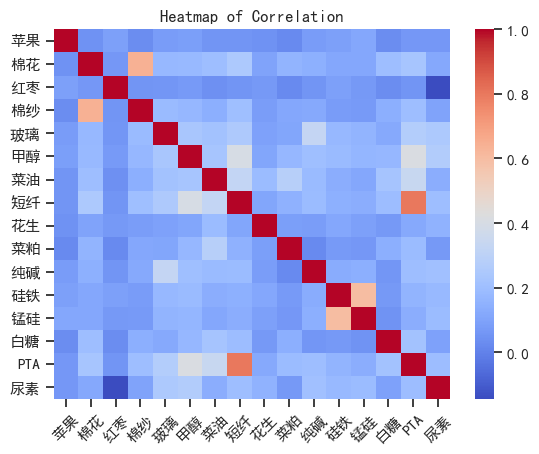

In [9]:
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
sns.heatmap(returns.corr(), cmap='coolwarm',xticklabels=cn_names,yticklabels=cn_names)
plt.title('Heatmap of Correlation')
plt.xticks(rotation=45)
plt.show()

相关性高的地方基本都可以被产业链上下游关系解释，比如PTA是生产短纤的原料，纯碱是生产玻璃的原料，棉花是生产棉纱的原料。
可以参考：https://zhuanlan.zhihu.com/p/395106285

以PF（短纤）和TA（PTA，精对苯二甲酸(Pure Terephthalic Acid)）为例

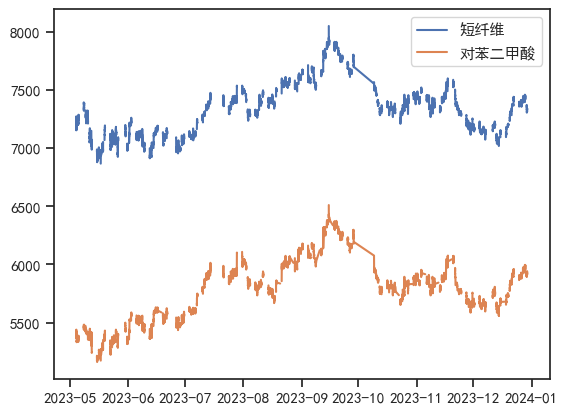

In [10]:
plt.plot(df['PF'],label='短纤维')
plt.plot(df['TA'],label='精对苯二甲酸')
plt.legend()
plt.show()

In [11]:
import statsmodels.api as sm
PF = returns['PF']
TA = returns['TA']

acf_PF = acf(PF.values, nlags=100, fft=True)
acf_TA = acf(TA.values, nlags=100, fft=True)

TA_lag_corr_with_PF = [PF.corr(TA.shift(lag)) for lag in range(1, 101)]
PF_lag_corr_with_TA = [TA.corr(PF.shift(lag)) for lag in range(1, 101)]

In [28]:
returns

,AP,CF,CJ,CY,FG,MA,OI,PF,PK,RM,SA,SF,SM,SR,TA,UR
resample_note,,,,,,,,,,,,,,,,
2023-05-04 08:59:00+08:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-05-04 09:00:00+08:00,-0.011798,0.005534,-0.004239,0.006690,0.003948,0.009620,0.001369,0.005869,0.001941,-0.005718,0.010690,-0.004408,0.003107,0.003043,-0.000369,0.006599
2023-05-04 09:01:00+08:00,-0.001137,-0.001942,0.005203,-0.000665,0.002247,0.001732,-0.005966,-0.006391,-0.001743,-0.001353,-0.006250,-0.001384,-0.003943,-0.002745,-0.005911,0.000000
2023-05-04 09:02:00+08:00,0.001594,0.000649,-0.000941,0.000443,-0.004484,-0.002594,-0.002876,0.000000,-0.001746,0.001694,-0.003870,-0.001385,0.003393,-0.001449,0.000372,0.000000
2023-05-04 09:03:00+08:00,-0.001591,-0.000972,0.007065,-0.000665,-0.003941,0.000867,-0.007901,0.000559,0.002138,-0.002367,-0.005828,0.001110,0.002254,0.001596,-0.001857,-0.000504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 14:55:00+08:00,-0.000612,0.000323,0.000000,0.001184,-0.000524,-0.001234,0.000000,-0.000273,0.000464,-0.001042,0.000491,-0.000299,-0.001252,0.000317,-0.000337,0.000000
2023-12-29 14:56:00+08:00,-0.000612,-0.000323,0.000000,-0.000473,0.003145,0.001235,-0.000501,-0.000273,0.000927,-0.000695,0.001471,-0.000599,0.000000,0.000158,0.000000,0.000474
2023-12-29 14:57:00+08:00,0.000735,0.000000,-0.000659,0.000237,-0.000522,-0.000411,-0.001002,0.000273,-0.001158,-0.000696,-0.000490,-0.000600,0.000000,-0.000317,0.000000,0.001421


In [29]:
returns.corrwith(returns.shift(1))

AP   -0.038105
CF   -0.066604
CJ   -0.028343
CY   -0.048275
FG   -0.057606
MA   -0.064994
OI    0.004604
PF   -0.026412
PK   -0.027936
RM    0.004017
SA   -0.047843
SF   -0.034536
SM   -0.057729
SR   -0.018273
TA   -0.039013
UR   -0.083278
dtype: float64

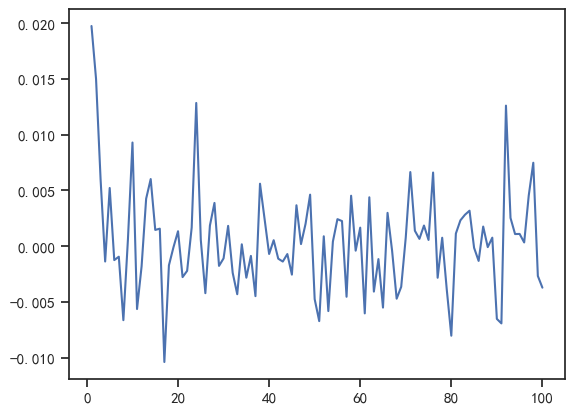

In [30]:
OI = returns['OI']
RM = returns['RM']
ser1 = [OI.corr(RM.shift(lag)) for lag in range(1, 101)]
plt.plot(range(1, 101),ser1)

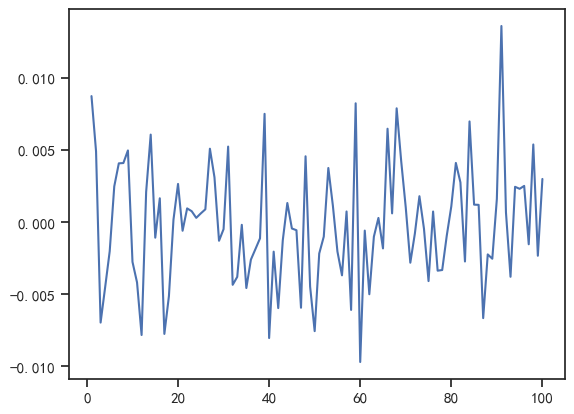

In [31]:
ser2 = [RM.corr(OI.shift(lag)) for lag in range(1, 101)]
plt.plot(range(1, 101),ser2)

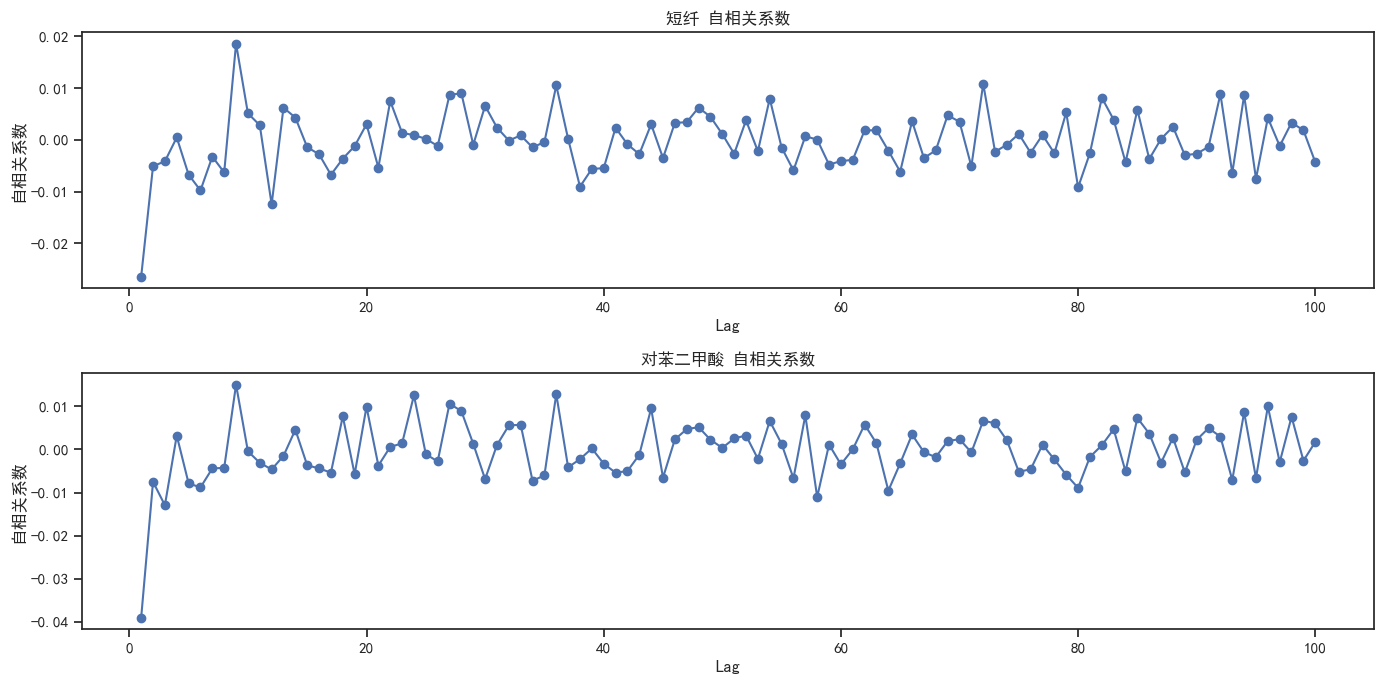

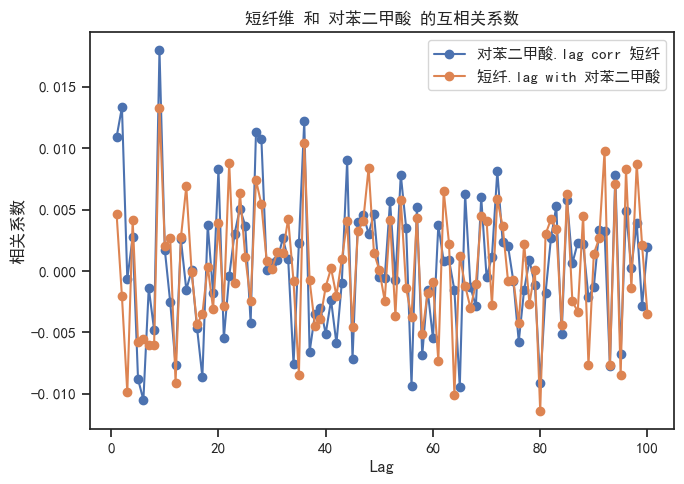

In [12]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(np.arange(1,101),acf_PF[1:], marker='o')
plt.title('短纤 自相关系数')
plt.xlabel('Lag')
plt.ylabel('自相关系数')

plt.subplot(2, 1, 2)
plt.plot(np.arange(1,101),acf_TA[1:], marker='o')
plt.title('对苯二甲酸 自相关系数')
plt.xlabel('Lag')
plt.ylabel('自相关系数')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(range(1, 101), TA_lag_corr_with_PF, marker='o',label='对苯二甲酸.lag corr 短纤')
plt.plot(range(1, 101), PF_lag_corr_with_TA, marker='o',label='短纤.lag with 对苯二甲酸')
plt.legend()
plt.title('短纤维 和 对苯二甲酸 的互相关系数')
plt.xlabel('Lag')
plt.ylabel('相关系数')
plt.tight_layout()
plt.show()

In [13]:
diff_returns = PF-TA
diff_returns.describe(percentiles=[.01,.05,.1,.3,.6,.9,.95,.99])

count    36122.000000
mean        -0.000002
std          0.000521
min         -0.018057
1%          -0.001031
5%          -0.000682
10%         -0.000525
30%         -0.000205
50%          0.000000
60%          0.000075
90%          0.000523
95%          0.000676
99%          0.001024
max          0.016035
dtype: float64

Text(0.5, 1.0, '如果持有一单位PF多头和适当数量的TA空头，累计收益率')

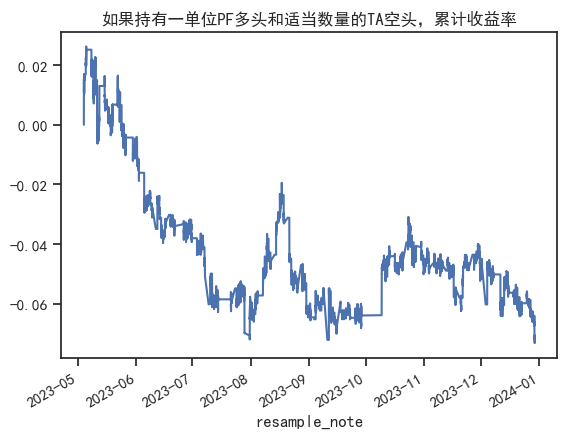

In [14]:
diff_returns.cumsum().plot()
plt.title('如果持有一单位PF多头和适当数量的TA空头，累计收益率')

98%的分钟里，两者相差千分之一以内

In [15]:
diff_returns

resample_note
2023-05-04 08:59:00+08:00    0.000000
2023-05-04 09:00:00+08:00    0.006238
2023-05-04 09:01:00+08:00   -0.000480
2023-05-04 09:02:00+08:00   -0.000372
2023-05-04 09:03:00+08:00    0.002417
                               ...   
2023-12-29 14:55:00+08:00    0.000064
2023-12-29 14:56:00+08:00   -0.000273
2023-12-29 14:57:00+08:00    0.000273
2023-12-29 14:58:00+08:00    0.000000
2023-12-29 14:59:00+08:00    0.000079
Length: 36122, dtype: float64

In [16]:
mdd = 0
peak = -float('inf')
cum_rtn = 0
mdd_start, mdd_end = 0, 0

for i,dr in enumerate(diff_returns):
    cum_rtn += dr
    if cum_rtn>=peak:
        peak = cum_rtn
        mdd_start = i
    if cum_rtn-peak<mdd:
        mdd = cum_rtn-peak
        mdd_end = i

print('最大回撤：',mdd,'最大回撤区间的长度(分钟)：',mdd_end,mdd_start)

最大回撤： -0.09942419131061431 最大回撤区间的长度(分钟)： 36042 451


In [17]:
rolling10sum = diff_returns.rolling(10,min_periods=1).sum()
rolling10sum.describe(percentiles=[.001,.01,.05,.1,.3,.6,.9,.95,.99,.999])

count    3.612200e+04
mean    -1.972569e-05
std      1.189653e-03
min     -1.917245e-02
0.1%    -1.059558e-02
1%      -3.095052e-03
5%      -1.527005e-03
10%     -1.073758e-03
30%     -3.997228e-04
50%     -8.647506e-07
60%      1.896348e-04
90%      1.036561e-03
95%      1.451354e-03
99%      3.119487e-03
99.9%    8.374548e-03
max      1.721829e-02
dtype: float64

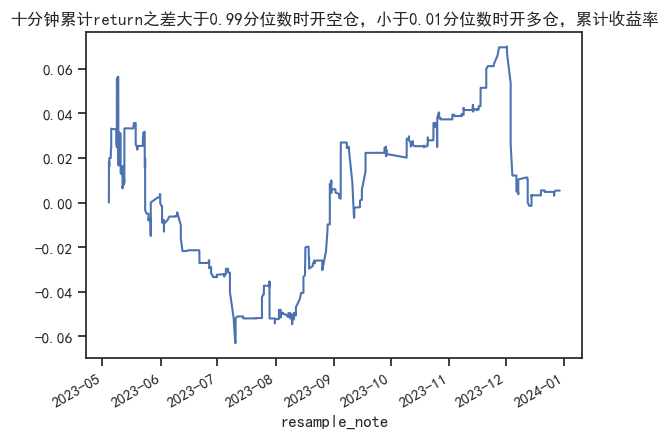

In [18]:
bound = 0.01
open_long = rolling10sum<rolling10sum.quantile(bound)
open_short = (rolling10sum>rolling10sum.quantile(1-bound))*-1
position = open_long + open_short
long_short_returns = rolling10sum*position.shift(-10).fillna(0).astype(bool)
long_short_returns.cumsum().plot()
plt.title(f'十分钟累计return之差大于{1-bound}分位数时开空仓，小于{bound}分位数时开多仓，累计收益率')
plt.show()

In [34]:
from sklearn.cluster import SpectralClustering

n_clusters = 5

sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)

labels = sc.fit_predict(rtn_corr)

print("Cluster labels:")
print(labels)

for i in range(n_clusters):
    cluster_index = df.columns[np.where(labels==i)[0]]
    cluster_names = cn_names[np.where(labels==i)[0]]
    print(f'cluster{i}: ',list(cluster_names))
    print(rtn_corr.loc[cluster_index,cluster_index])
    print('--------------------------------------------')

Cluster labels:
[2 0 2 0 1 1 3 1 3 3 1 4 4 3 1 1]
cluster0:  ['棉花', '棉纱']
          CF        CY
CF  1.000000  0.640627
CY  0.640627  1.000000
--------------------------------------------
cluster1:  ['玻璃', '甲醇', '短纤', '纯碱', 'PTA', '尿素']
          FG        MA        PF        SA        TA        UR
FG  1.000000  0.233319  0.250952  0.326166  0.268390  0.247766
MA  0.233319  1.000000  0.398635  0.202001  0.411228  0.263232
PF  0.250952  0.398635  1.000000  0.190170  0.802843  0.197656
SA  0.326166  0.202001  0.190170  1.000000  0.198178  0.203967
TA  0.268390  0.411228  0.802843  0.198178  1.000000  0.192999
UR  0.247766  0.263232  0.197656  0.203967  0.192999  1.000000
--------------------------------------------
cluster2:  ['苹果', '红枣']
          AP        CJ
AP  1.000000  0.087597
CJ  0.087597  1.000000
--------------------------------------------
cluster3:  ['菜油', '花生', '菜粕', '白糖']
          OI        PK        RM        SR
OI  1.000000  0.186195  0.283790  0.225958
PK  0.186195  1.0

In [20]:
from scipy.optimize import minimize

In [41]:
def portfolio(cluster):
    print(list(cn_names[np.where(labels==cluster)[0]]))
    cluster_index = df.columns[np.where(labels==cluster)[0]]
    returns[cluster_index]

    rtn_cluster = returns[cluster_index]
    returns_mean = rtn_cluster.mean()
    cov_matrix = rtn_cluster.cov()

    def portfolio_std(weights, cov_matrix):
        var = weights.T @ cov_matrix @ weights
        std = np.sqrt(var)
        return std

    num_assets = len(rtn_cluster.columns)
    initial_weights = np.array([1/num_assets] * num_assets)

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((-1, 1) for asset in range(num_assets))

    result = minimize(portfolio_std, initial_weights, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_weights = result.x

    print("Optimal Weights:")
    print(optimal_weights)

    cluster_portfolio_rtn = rtn_cluster@optimal_weights
    return cluster_portfolio_rtn

In [42]:
cluster_portfolio_rtn = portfolio(0)
cluster_portfolio_rtn.describe()

['棉花', '棉纱']
Optimal Weights:
[0.5 0.5]


count    3.612200e+04
mean    -4.232524e-07
std      6.767970e-04
min     -2.059072e-02
25%     -2.745880e-04
50%      0.000000e+00
75%      2.734941e-04
max      2.406586e-02
dtype: float64

In [44]:
cluster_portfolio_rtn = portfolio(1)
cluster_portfolio_rtn.describe()

['玻璃', '甲醇', '短纤', '纯碱', 'PTA', '尿素']
Optimal Weights:
[ 0.10565007  0.23001028  0.28449306 -0.03408788  0.25866589  0.15526857]


count    36122.000000
mean         0.000002
std          0.000739
min         -0.018512
25%         -0.000360
50%          0.000002
75%          0.000366
max          0.020738
dtype: float64

In [45]:
cluster_portfolio_rtn = portfolio(2)
cluster_portfolio_rtn.describe()

['苹果', '红枣']
Optimal Weights:
[0.5 0.5]


count    36122.000000
mean         0.000004
std          0.000910
min         -0.039922
25%         -0.000331
50%          0.000000
75%          0.000333
max          0.099065
dtype: float64

In [46]:
cluster_portfolio_rtn = portfolio(3)
cluster_portfolio_rtn.describe()

['菜油', '花生', '菜粕', '白糖']
Optimal Weights:
[0.25 0.25 0.25 0.25]


count    36122.000000
mean        -0.000002
std          0.000603
min         -0.046008
25%         -0.000240
50%          0.000000
75%          0.000243
max          0.024532
dtype: float64

In [47]:
cluster_portfolio_rtn = portfolio(4)
cluster_portfolio_rtn.describe()

['硅铁', '锰硅']
Optimal Weights:
[0.5 0.5]


count    36122.000000
mean        -0.000002
std          0.000691
min         -0.016525
25%         -0.000295
50%          0.000000
75%          0.000293
max          0.023696
dtype: float64

In [ ]:
SHFE_minu_price = futures.all_bid_minute_bar_in_one_exchange('SHFE',multi_processor=1)
SHFE_minu_price.columns = [i[:-11] for i in SHFE_minu_price.columns]
SHFE_minu_price